In [41]:
import os
import json
import sqlite3

import pandas as pd
import matplotlib as plt

In [42]:
filepath = 'data/'

In [43]:
data = []

for filename in os.listdir(filepath):
    cnx = sqlite3.connect(filepath + filename)
    df_string = pd.read_sql_query("SELECT * FROM COUNTERS_STRING_TIME_DATA", cnx)
    df_ull = pd.read_sql_query("SELECT * FROM COUNTERS_ULL_TIME_DATA", cnx)
    df_data = pd.concat([df_string, df_ull], ignore_index = True)
    data.append(pd.DataFrame(df_data))
    schema = pd.DataFrame(pd.read_sql_query("SELECT * FROM INPUTS", cnx))

In [44]:
df = pd.concat(data, ignore_index = True)

In [45]:
df['MEASUREMENT_TIME'] = pd.to_datetime(df['MEASUREMENT_TIME'])
df['PRIVATE_DATA'] = df['PRIVATE_DATA'].astype(int)
#df['VALUE'] = df['VALUE'].str.lower()

In [46]:
df.dtypes

MEASUREMENT_TIME    datetime64[ns]
ID_INPUT                     int64
VALUE                       object
PRIVATE_DATA                 int32
dtype: object

In [47]:
df = df.sort_values(by = ['MEASUREMENT_TIME'], ignore_index = True)

In [48]:
df

MEASUREMENT_TIME  ID_INPUT               VALUE  PRIVATE_DATA
0    2023-01-15 18:20:31.552         3            esrv.exe             0
1    2023-01-15 18:20:31.552        11                   0             0
2    2023-01-15 18:20:31.552        10                   0             0
3    2023-01-15 18:20:31.552         9                 672             0
4    2023-01-15 18:20:31.552         8                 154             0
...                      ...       ...                 ...           ...
3919 2023-01-16 04:29:33.175         5  ConsoleWindowClass             0
3920 2023-01-16 04:29:33.175        10                   0             0
3921 2023-01-16 04:29:33.175         3            esrv.exe             0
3922 2023-01-16 04:29:33.175         1               19592             0
3923 2023-01-16 04:29:33.175        11                   0             0

[3924 rows x 4 columns]

In [49]:
shape = df.shape
print("Number of data points collected so far: " + str(shape[0]))

Number of data points collected so far: 3924


In [50]:
schema[['ID_INPUT', 'INPUT_NAME', 'INPUT_DESCRIPTION']]

ID_INPUT           INPUT_NAME                     INPUT_DESCRIPTION
0          0   FOREGROUND-WIND(0)             Foreground Window Root ID
1          1   FOREGROUND-WIND(1)          Foreground Window Process ID
2          2   FOREGROUND-WIND(2)           Foreground Window Thread ID
3          3   FOREGROUND-WIND(3)                Foreground Window Name
4          4   FOREGROUND-WIND(4)          Foreground Window Image Name
5          5   FOREGROUND-WIND(5)          Foreground Window Class Name
6          6   FOREGROUND-WIND(6)        Window Upper Left X Coordinate
7          7   FOREGROUND-WIND(7)       Window Lower Right X Coordinate
8          8   FOREGROUND-WIND(8)        Window Upper Left Y Coordinate
9          9   FOREGROUND-WIND(9)       Window Lower Right Y Coordinate
10        10  FOREGROUND-WIND(10)       Check if the App is Hung or Not
11        11  FOREGROUND-WIND(11)  Check if the App is Immersive or Not

In [51]:
df.dtypes

MEASUREMENT_TIME    datetime64[ns]
ID_INPUT                     int64
VALUE                       object
PRIVATE_DATA                 int32
dtype: object

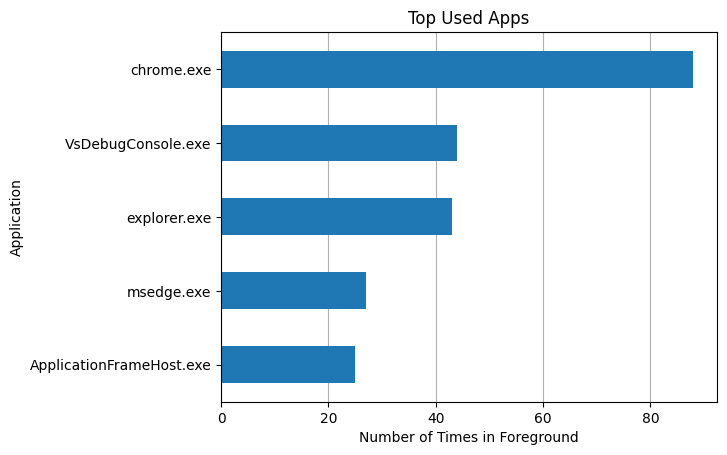

In [52]:
plot = df[df['ID_INPUT'] == 4]['VALUE'].value_counts()[:5].plot.barh(x = 'index', y = 'VALUE')
plot.set_axisbelow(True)
plot.set_xlabel('Number of Times in Foreground')
plot.set_ylabel('Application')
plot.set_title('Top Used Apps')
plot.invert_yaxis()
plt.pyplot.grid(axis = 'x')
plt.pyplot.show()

In [53]:
df[df['ID_INPUT'] == 4]['VALUE'].unique()
#unable to open process is when we use command prompt as an adminstrator

array(['VsDebugConsole.exe', 'explorer.exe', 'devenv.exe',
       'ApplicationFrameHost.exe', 'chrome.exe',
       'ShellExperienceHost.exe', 'SearchApp.exe',
       'Unable To Open Process', 'SnippingTool.exe',
       'DB Browser for SQLite.exe', 'Code.exe',
       'CodeSetup-stable-97dec172d3256f8ca4bfb2143f3f76b503ca0534.tmp',
       'IDMan.exe', 'msedge.exe'], dtype=object)

In [54]:
df_string['MEASUREMENT_TIME'].min()

'2023-01-16 03:36:50.435'

In [55]:
df_string['MEASUREMENT_TIME'].max()

'2023-01-16 04:29:33.175'

In [56]:
df[df['ID_INPUT'] == 10]['VALUE'].unique()

array([0], dtype=object)

In [57]:
#df.to_csv('dataUser1.csv')